In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
olt = pd.read_excel(r"C:\Users\User\Desktop\Study Guide\ML Projects\Linear Regression\ML_Optical_Power\Optical_Power\Multiple linear regression.xlsx")

In [9]:
olt.head()

,Date,OLT,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,ACCOUNT NUMBER,FAT_ID,FDT
0,2024-08-01,TCI45501OLT01,1,0,0,--,--,--,--,--
1,2024-08-01,TCI45501OLT01,1,0,1,--,--,--,--,--
2,2024-08-01,TCI45501OLT01,1,0,2,-1777,-2018,242000164707,TCI45501A/D01a/P003,TCI45501A/D01
3,2024-08-01,TCI45501OLT01,1,0,3,-1759,-2051,242000256147,TCI45501A/D01a/P001,TCI45501A/D01
4,2024-08-01,TCI45501OLT01,1,0,4,-1812,-2032,242000082754,TCI45501A/D01a/P003,TCI45501A/D01


In [10]:
olt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112395 entries, 0 to 112394
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                112395 non-null  datetime64[ns]
 1   OLT                 112395 non-null  object        
 2   SN                  112395 non-null  int64         
 3   PN                  112395 non-null  int64         
 4   ONTID               112395 non-null  int64         
 5   OPTICSRXPOWER       112395 non-null  object        
 6   OPTICSRXPOWERbyOLT  112395 non-null  object        
 7   ACCOUNT NUMBER      112395 non-null  object        
 8   FAT_ID              112395 non-null  object        
 9   FDT                 112395 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 8.6+ MB


In [18]:
olt.shape

(112395, 10)

In [20]:
olt.sample(10)

,Date,OLT,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,ACCOUNT NUMBER,FAT_ID,FDT
95918,2024-08-27,TUJ02701OLT01,12,5,0,--,--,242000059203,TUJ02701B/D17a/P009,TUJ02701B/D17
83423,2024-08-23,TSD40101OLT01,14,9,4,-1682,-1833,242000113359,TSD40101D/D31b/P021,TSD40101D/D31
74208,2024-08-21,TPL17701OLT01,7,9,10,-1705,-1755,242000212209,TPL17701B/D14b/P009,TPL17701B/D14
6527,2024-08-02,TCI45501OLT02,3,3,3,-2200,-2553,242000153402,TCI45501B/D16a/P015,TCI45501B/D16
41314,2024-08-12,TFO45301OLT01,1,7,4,--,--,242000244976,TFO45301A/D01c/P027,TFO45301A/D01
24777,2024-08-07,TDB16001OLT01,13,10,2,-1958,-2409,242000230568,TDB16001B/D19b/P026,TDB16001B/D19
6841,2024-08-02,TCI45501OLT02,3,14,17,-2310,-2293,242000079018,TCI45501B/D17a/P018,TCI45501B/D17
73167,2024-08-21,TPL17701OLT01,4,13,3,-1987,-2108,242000195761,TPL17701A/D09b/P007,TPL17701A/D09
35314,2024-08-10,TDV09201OLT01,7,0,26,-1879,-2181,242000273014,TDV09202A/D09a/P002,TDV09202A/D09
92391,2024-08-26,TSU70801OLT01,16,0,4,-1692,-1936,242000233088,TSU70801B/D10a/P038,TSU70801B/D10


In [16]:
olt.corr(numeric_only = True)

,SN,PN,ONTID
SN,1.000000,-0.022853,-0.043570
PN,-0.022853,1.000000,-0.002142
ONTID,-0.043570,-0.002142,1.000000


In [26]:
pd.set_option('future.no_silent_downcasting', True)

In [27]:
no_dashes = ["OPTICSRXPOWER","OPTICSRXPOWERbyOLT"]

for column in no_dashes:
    olt[column] = olt[column].replace("--",np.nan)

In [32]:
olt.sample(10)

,Date,OLT,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,ACCOUNT NUMBER,FAT_ID,FDT
16383,2024-08-05,TCX18501OLT01,2,14,15,-2017.0,-2388.0,242000179692,TCX18501A/D04a/P001,TCX18501A/D04
44412,2024-08-12,TFO45301OLT01,13,11,8,-1882.0,-2103.0,242000158320,TFO45301B/D18a/P017,TFO45301B/D18
26792,2024-08-08,TDE06501OLT01,7,9,18,-2537.0,-3046.0,242000081526,TDE06501B/D12a/E006,TDE06501B/D12
12057,2024-08-04,TCS10001OLT01,3,12,17,-1804.0,-1890.0,242000105946,TCS10001A/D05b/P018,TCS10001A/D05
7415,2024-08-02,TCI45501OLT02,5,9,11,-1841.0,-2168.0,242000284274,TCI45501B/D20b/P030,TCI45501B/D20
37878,2024-08-10,TDV09201OLT01,16,8,22,-1636.0,-2027.0,242000013039,TDV09202C/D19a/P004,TDV09202C/D19
7611,2024-08-03,TCP71101OLT01,1,6,14,NaN,NaN,242000288789,TCP71101A/D01b/P025,TCP71101A/D01
106563,2024-08-30,TAR40901OLT01,6,15,11,-1545.0,-1794.0,242000046854,TAR40901B/D11a/P007,TAR40901B/D11
36567,2024-08-10,TDV09201OLT01,12,7,12,-1518.0,-1676.0,242000153101,TDV09202C/D13c/P029,TDV09202C/D13
212,2024-08-01,TCI45501OLT01,1,9,17,NaN,NaN,242000078296,TCI45501A/D01c/P037,TCI45501A/D01


In [33]:
olt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112395 entries, 0 to 112394
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                112395 non-null  datetime64[ns]
 1   OLT                 112395 non-null  object        
 2   SN                  112395 non-null  int64         
 3   PN                  112395 non-null  int64         
 4   ONTID               112395 non-null  int64         
 5   OPTICSRXPOWER       106894 non-null  float64       
 6   OPTICSRXPOWERbyOLT  106897 non-null  float64       
 7   ACCOUNT NUMBER      112395 non-null  object        
 8   FAT_ID              112395 non-null  object        
 9   FDT                 112395 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 8.6+ MB


In [34]:
oltm = olt.dropna()

In [35]:
oltm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106894 entries, 2 to 112394
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                106894 non-null  datetime64[ns]
 1   OLT                 106894 non-null  object        
 2   SN                  106894 non-null  int64         
 3   PN                  106894 non-null  int64         
 4   ONTID               106894 non-null  int64         
 5   OPTICSRXPOWER       106894 non-null  float64       
 6   OPTICSRXPOWERbyOLT  106894 non-null  float64       
 7   ACCOUNT NUMBER      106894 non-null  object        
 8   FAT_ID              106894 non-null  object        
 9   FDT                 106894 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 9.0+ MB


In [36]:
oltm.corr(numeric_only = True)

,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT
SN,1.000000,-0.023759,-0.043565,-0.027647,-0.033998
PN,-0.023759,1.000000,-0.002811,0.006115,-0.004221
ONTID,-0.043565,-0.002811,1.000000,-0.006647,-0.004911
OPTICSRXPOWER,-0.027647,0.006115,-0.006647,1.000000,0.880109
OPTICSRXPOWERbyOLT,-0.033998,-0.004221,-0.004911,0.880109,1.000000


In [40]:
oltm["OLT"].unique()

array(['TCI45501OLT01', 'TCI45501OLT02', 'TCP71101OLT01', 'TCS10001OLT01',
       'TCX18501OLT01', 'TDA47401OLT01', 'TDB16001OLT01', 'TDE06501OLT01',
       'TDL35101OLT01', 'TDV09201OLT01', 'TES02001OLT01', 'TFO45301OLT01',
       'TGG48401OLT01', 'TGR70401OLT01', 'TJO41601OLT01', 'TLV08501OLT01',
       'TMY47301OLT01', 'TPA54901OLT01', 'TPH17101OLT01', 'TPI15901OLT01',
       'TPL17701OLT01', 'TSA36401OLT01', 'TSD40101OLT01', 'TSD40102OLT02',
       'TSK36201OLT01', 'TSU70801OLT01', 'TUJ02701OLT01', 'TAM54501OLT01',
       'TAN80901OLT01', 'TAR40901OLT01', 'TAS47001OLT01'], dtype=object)

In [43]:
olt_encoded = pd.get_dummies(oltm, columns=['OLT', ], dtype=int)

In [47]:
olt_encoded.sample(10)

,Date,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,ACCOUNT NUMBER,FAT_ID,FDT,OLT_TAM54501OLT01,...,OLT_TPA54901OLT01,OLT_TPH17101OLT01,OLT_TPI15901OLT01,OLT_TPL17701OLT01,OLT_TSA36401OLT01,OLT_TSD40101OLT01,OLT_TSD40102OLT02,OLT_TSK36201OLT01,OLT_TSU70801OLT01,OLT_TUJ02701OLT01
69254,2024-08-20,4,7,23,-1710.0,-2009.0,242000288731,TPI15901B/D13b/P021,TPI15901B/D13,0,...,0,0,1,0,0,0,0,0,0,0
74252,2024-08-21,7,11,3,-1987.0,-2338.0,242000099268,TPL17701B/D14b/P020,TPL17701B/D14,0,...,0,0,0,1,0,0,0,0,0,0
42017,2024-08-12,3,10,6,-1719.0,-1907.0,242000125868,TFO45301A/D05c/P007,TFO45301A/D05,0,...,0,0,0,0,0,0,0,0,0,0
107388,2024-08-30,11,11,0,-1675.0,-1845.0,242000036367,TAR40901B/D15c/P032,TAR40901B/D15,0,...,0,0,0,0,0,0,0,0,0,0
89990,2024-08-26,6,3,8,-1671.0,-1697.0,242000044392,TSU70801B/D09c/P034,TSU70801B/D09,0,...,0,0,0,0,0,0,0,0,1,0
5523,2024-08-02,0,11,6,-1597.0,-1740.0,242000076611,TCI45501B/D12a/P005,TCI45501B/D12,0,...,0,0,0,0,0,0,0,0,0,0
90622,2024-08-26,8,3,10,-1809.0,-1988.0,242000069459,TSU70801B/D13a/P008,TSU70801B/D13,0,...,0,0,0,0,0,0,0,0,1,0
82999,2024-08-23,13,3,14,-1752.0,-1921.0,242000115851,TSD40101C/D26a/P002,TSD40101C/D26,0,...,0,0,0,0,0,1,0,0,0,0
44874,2024-08-12,15,3,4,-1677.0,-1807.0,242000123407,TFO45301C/D20c/P037,TFO45301C/D20,0,...,0,0,0,0,0,0,0,0,0,0
53172,2024-08-15,7,3,26,-1554.0,-1783.0,242000209326,TJO41601B/D12a/P008,TJO41601B/D12,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
olt_encoded.corr(numeric_only = True) ["OPTICSRXPOWERbyOLT"]

SN                   -0.033998
PN                   -0.004221
ONTID                -0.004911
OPTICSRXPOWER         0.880109
OPTICSRXPOWERbyOLT    1.000000
OLT_TAM54501OLT01     0.031329
OLT_TAN80901OLT01     0.022408
OLT_TAR40901OLT01     0.067527
OLT_TAS47001OLT01     0.048585
OLT_TCI45501OLT01    -0.011349
OLT_TCI45501OLT02     0.030297
OLT_TCP71101OLT01    -0.117543
OLT_TCS10001OLT01     0.019580
OLT_TCX18501OLT01     0.008557
OLT_TDA47401OLT01     0.042823
OLT_TDB16001OLT01    -0.056849
OLT_TDE06501OLT01    -0.029117
OLT_TDL35101OLT01     0.052568
OLT_TDV09201OLT01     0.005528
OLT_TES02001OLT01     0.027498
OLT_TFO45301OLT01     0.015665
OLT_TGG48401OLT01     0.021827
OLT_TGR70401OLT01    -0.150025
OLT_TJO41601OLT01     0.016479
OLT_TLV08501OLT01     0.034826
OLT_TMY47301OLT01     0.067745
OLT_TPA54901OLT01     0.022456
OLT_TPH17101OLT01    -0.103107
OLT_TPI15901OLT01     0.038560
OLT_TPL17701OLT01    -0.063615
OLT_TSA36401OLT01     0.038207
OLT_TSD40101OLT01    -0.018813
OLT_TSD4

In [50]:
olt_encoded["FAT_ID"].nunique()

20899

In [51]:
olt_encoded["FDT"].nunique()

668

In [60]:
pd.options.mode.copy_on_write = True

In [66]:
oltm["OPTICSRXPOWER"] = (oltm["OPTICSRXPOWER"] /100)
oltm["OPTICSRXPOWERbyOLT"] = (oltm["OPTICSRXPOWERbyOLT"] /100) 


In [71]:
oltm = oltm.drop(columns =['OPTICSRXPOWER_Corrected'])

In [74]:
oltm["OPTICSRXPOWER"] = (oltm["OPTICSRXPOWER"] *100)

In [75]:
oltm.sample(5)

,Date,OLT,SN,PN,ONTID,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,ACCOUNT NUMBER,FAT_ID,FDT
110860,2024-08-31,TAS47001OLT01,8,8,0,-16.16,-19.21,242000274689,TAS47001B/D14a/P004,TAS47001B/D14
74161,2024-08-21,TPL17701OLT01,7,7,16,-16.00,-17.86,242000274783,TPL17701B/D14a/P003,TPL17701B/D14
91702,2024-08-26,TSU70801OLT01,13,9,8,-22.84,-23.98,242000038125,TSU70801C/D19b/P022,TSU70801C/D19
78442,2024-08-22,TSA36401OLT01,5,13,10,-18.63,-20.46,242000046329,TSA36401A/D08b/P029,TSA36401A/D08
70787,2024-08-20,TPI15901OLT01,11,9,7,-16.32,-17.40,242000119017,TPI15901D/D31b/P037,TPI15901D/D31


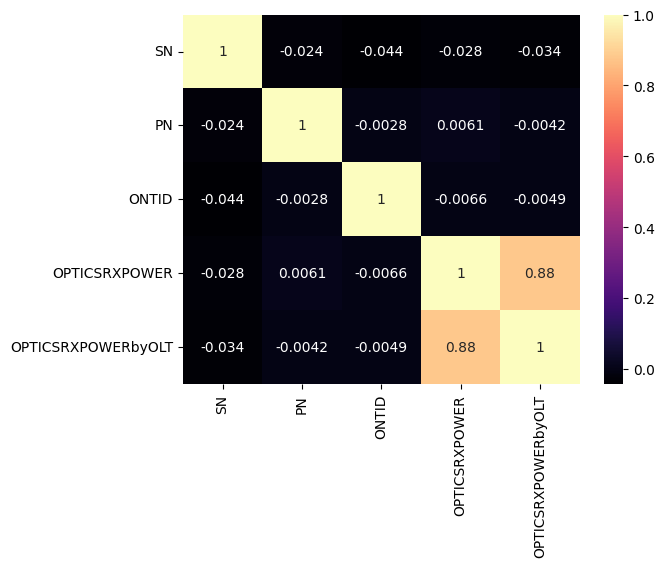

In [73]:
olt_corr = sns.heatmap(oltm.corr(numeric_only=True), cmap="magma", annot=True)

In [56]:
plt.show()

In [76]:
oltm["OLT"].nunique()

31

In [77]:
oltm["OLT"].unique()

array(['TCI45501OLT01', 'TCI45501OLT02', 'TCP71101OLT01', 'TCS10001OLT01',
       'TCX18501OLT01', 'TDA47401OLT01', 'TDB16001OLT01', 'TDE06501OLT01',
       'TDL35101OLT01', 'TDV09201OLT01', 'TES02001OLT01', 'TFO45301OLT01',
       'TGG48401OLT01', 'TGR70401OLT01', 'TJO41601OLT01', 'TLV08501OLT01',
       'TMY47301OLT01', 'TPA54901OLT01', 'TPH17101OLT01', 'TPI15901OLT01',
       'TPL17701OLT01', 'TSA36401OLT01', 'TSD40101OLT01', 'TSD40102OLT02',
       'TSK36201OLT01', 'TSU70801OLT01', 'TUJ02701OLT01', 'TAM54501OLT01',
       'TAN80901OLT01', 'TAR40901OLT01', 'TAS47001OLT01'], dtype=object)

In [147]:
X = oltm[["OPTICSRXPOWER"]]
y = oltm[["OPTICSRXPOWERbyOLT"]]

In [82]:
X.head()

,OPTICSRXPOWER
2,-17.77
3,-17.59
4,-18.12
5,-17.47
6,-17.54


In [84]:
X =sm.add_constant(X)

In [85]:
X.head()

,const,OPTICSRXPOWER
2,1.0,-17.77
3,1.0,-17.59
4,1.0,-18.12
5,1.0,-17.47
6,1.0,-17.54


In [148]:
reg_res = sm.OLS(y,X).fit()
print(reg_res.summary())

                                 OLS Regression Results                                
Dep. Variable:     OPTICSRXPOWERbyOLT   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.014e+07
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:28:47   Log-Likelihood:                     -1.9796e+05
No. Observations:              106894   AIC:                                  3.959e+05
Df Residuals:                  106893   BIC:                                  3.959e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [100]:
pred_y = reg_res.predict(X)

In [101]:
data = oltm.copy()

In [102]:
data = data.drop(columns = ["Date","SN","PN","ONTID","ACCOUNT NUMBER","FAT_ID","FDT"])

In [103]:
data.head()


,OLT,OPTICSRXPOWER,OPTICSRXPOWERbyOLT
2,TCI45501OLT01,-17.77,-20.18
3,TCI45501OLT01,-17.59,-20.51
4,TCI45501OLT01,-18.12,-20.32
5,TCI45501OLT01,-17.47,-20.05
6,TCI45501OLT01,-17.54,-19.96


In [104]:
data["predicted_OPTICSRXPOWERbyOLT"] = pred_y

In [105]:
data.head()

,OLT,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,predicted_OPTICSRXPOWERbyOLT
2,TCI45501OLT01,-17.77,-20.18,-20.164774
3,TCI45501OLT01,-17.59,-20.51,-19.988148
4,TCI45501OLT01,-18.12,-20.32,-20.508212
5,TCI45501OLT01,-17.47,-20.05,-19.870398
6,TCI45501OLT01,-17.54,-19.96,-19.939086


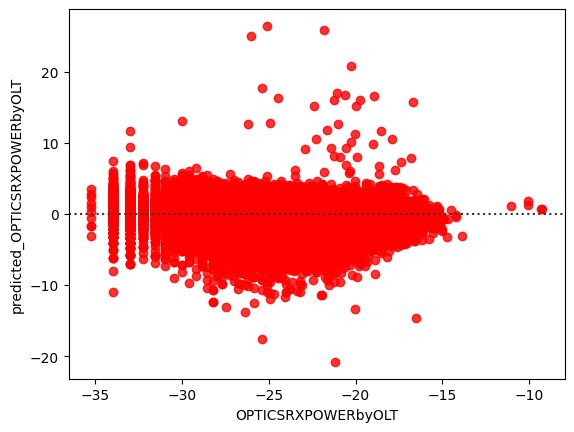

In [112]:
sns.residplot(data= data, x="OPTICSRXPOWERbyOLT", y="predicted_OPTICSRXPOWERbyOLT", label="Residuals", color="Red")
plt.show()

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106894 entries, 2 to 112394
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   OLT                           106894 non-null  object 
 1   OPTICSRXPOWER                 106894 non-null  float64
 2   OPTICSRXPOWERbyOLT            106894 non-null  float64
 3   predicted_OPTICSRXPOWERbyOLT  106894 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [124]:
input_df.head()

,OLT,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,predicted_OPTICSRXPOWERbyOLT
2,TCI45501OLT01,-17.77,-20.18,-20.164774
3,TCI45501OLT01,-17.59,-20.51,-19.988148
4,TCI45501OLT01,-18.12,-20.32,-20.508212
5,TCI45501OLT01,-17.47,-20.05,-19.870398
6,TCI45501OLT01,-17.54,-19.96,-19.939086


In [142]:
OLT = ['TPH17101OLT01']
OLT_TPH = data[data.OLT.isin(OLT)]

In [130]:
OLT_TPH.shape


(1482, 4)

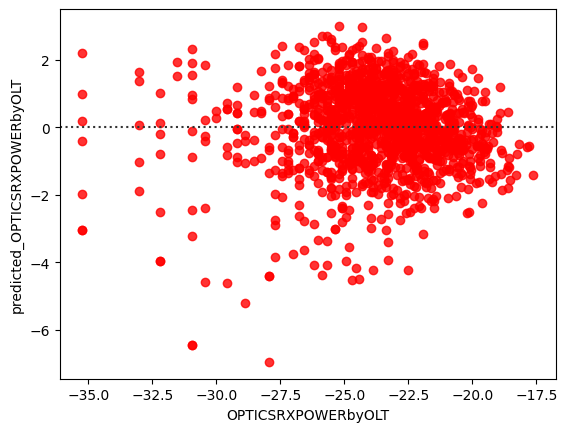

In [145]:
sns.residplot(data= OLT_TPH, x="OPTICSRXPOWERbyOLT", y="predicted_OPTICSRXPOWERbyOLT", label="Residuals",  color="Red")
plt.show()

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  

In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

0.7798122189992389

Text(0, 0.5, 'OPTICSRXPOWERbyOLT')

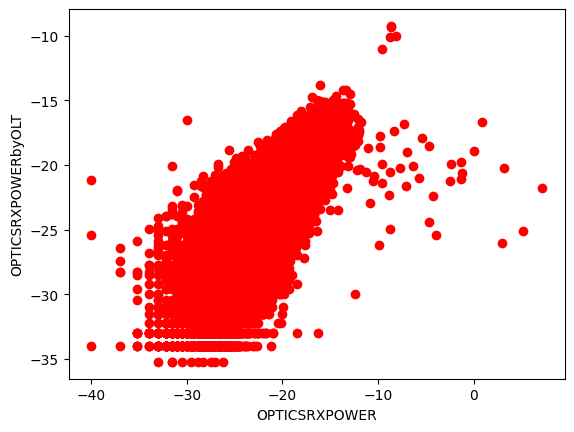

In [159]:
plt.scatter(X, y , color="red")
plt.xlabel("OPTICSRXPOWER")
plt.ylabel("OPTICSRXPOWERbyOLT")

In [167]:
# Calculate the R squared score
r2_score_TPH = r2_score(X, y)

# Output the mean squared error
r2_score_TPH

0.002331122278689035

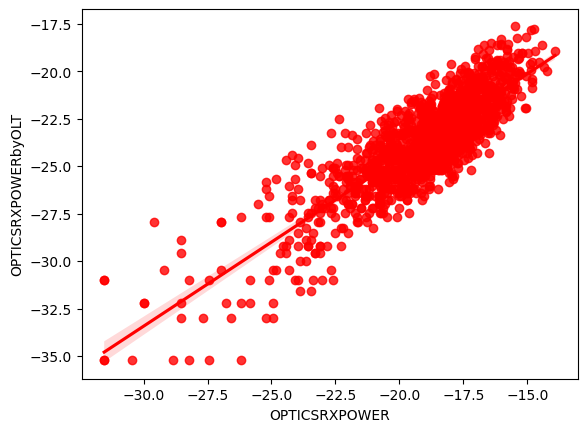

In [177]:
p= sns.regplot(data = OLT_TPH, x="OPTICSRXPOWER", y="OPTICSRXPOWERbyOLT", color="Red")
plt.show()

In [169]:
import scipy

Text(-27.5, -20, 'y = -6.86 + 0.886x')

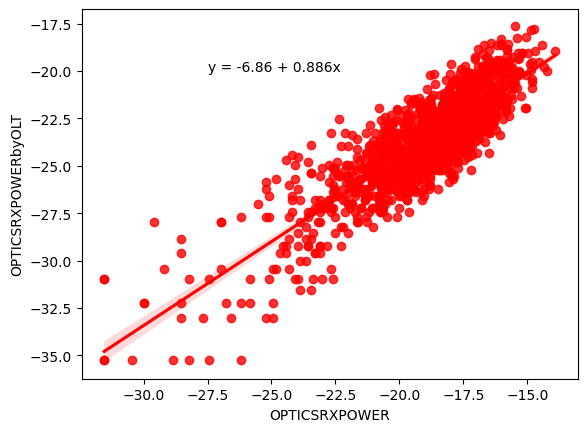

In [181]:
p= sns.regplot(data = OLT_TPH, x="OPTICSRXPOWER", y="OPTICSRXPOWERbyOLT", color="Red")

#calculate slope and intercept of regression equation

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#add regression equation to plot 
plt.text(-27.5, -20, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

In [182]:
OLT_TPH.describe()

,OPTICSRXPOWER,OPTICSRXPOWERbyOLT,predicted_OPTICSRXPOWERbyOLT
count,1482.000000,1482.000000,1482.000000
mean,-19.029426,-23.711532,-21.400590
std,2.420288,2.520854,2.374915
min,-31.540000,-35.230000,-33.676627
25%,-20.130000,-25.090000,-22.480531
50%,-18.585000,-23.470000,-20.964495
75%,-17.440000,-22.150000,-19.840960
max,-13.910000,-17.620000,-16.377137
